# 2.Chỉnh các hyperparameter: learning rate, activation function, số hidden layer, số node. Thử dùng các model đơn giản hơn (không có hidden layer, 1 hidden layer) hay phức tạp hơn (nhiều hidden layer và node hơn), vẽ loss function theo epoch tương ứng.

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt

In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape, y_test[0]

((28, 28), 7)

In [ ]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize (0-1)
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
# convert class vectors to binary class matrices
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
print((784, ))

(784,)


# Hyperparameter

In [ ]:
def build_model():
  model = Sequential()
  # input_shape
  model.add(Dense(512, activation='relu', input_shape=(784,)))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))
  return model

# model.summary()

####1. Change learning rate:

In [1]:
learning_rates = [0.001,0.1,0.05,0.01]
for i, l_r in enumerate(learning_rates):
    model = build_model()
    model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate= l_r), 
              metrics=['accuracy'])
    
    H = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
    
    plt.plot(H.history['loss'], label = str(l_r))
    
  


NameError: ignored

In [2]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

NameError: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06448139995336533
Test accuracy: 0.9815000295639038


#### 2. Change activation function:

In [ ]:
model1 = Sequential()
# input_shape
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate= 0.01), # adam, .... gradient descent
              metrics=['accuracy'])
H1 = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 1.1689 - accuracy: 0.7016 - val_loss: 0.5541 - val_accuracy: 0.8615
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4684 - accuracy: 0.8770 - val_loss: 0.3802 - val_accuracy: 0.8976
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3651 - accuracy: 0.8992 - val_loss: 0.3208 - val_accuracy: 0.9114
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.9102 - val_loss: 0.2930 - val_accuracy: 0.9164
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2913 - accuracy: 0.9176 - val_loss: 0.2676 - val_accuracy: 0.9250
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2704 - accuracy: 0.9232 - val_loss: 0.2519 - val_accuracy: 0.9293
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2537 - accuracy: 0.9283 - val_loss: 0.2379 - val_accuracy: 0.9331
Epoch 

In [ ]:
model2 = Sequential()
# input_shape
model2.add(Dense(512, activation='tanh', input_shape=(784,)))
model2.add(Dense(32, activation='tanh'))
model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01), # adam, .... gradient descent
              metrics=['accuracy'])
H2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 0.9667 - accuracy: 0.7654 - val_loss: 0.6000 - val_accuracy: 0.8621
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5274 - accuracy: 0.8737 - val_loss: 0.4507 - val_accuracy: 0.8938
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.8918 - val_loss: 0.3892 - val_accuracy: 0.9032
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3806 - accuracy: 0.9004 - val_loss: 0.3522 - val_accuracy: 0.9085
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3501 - accuracy: 0.9067 - val_loss: 0.3283 - val_accuracy: 0.9134
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3282 - accuracy: 0.9111 - val_loss: 0.3109 - val_accuracy: 0.9182
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.9144 - val_loss: 0.2974 - val_accuracy: 0.9212
Epoch 

In [ ]:
model3 = Sequential()
# input_shape
model3.add(Dense(512, activation='selu', input_shape=(784,)))
model3.add(Dense(32, activation='selu'))
model3.add(Dense(num_classes, activation='softmax'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                16416     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                330       
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01), # adam, .... gradient descent
              metrics=['accuracy'])
H3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 0.6605 - accuracy: 0.8227 - val_loss: 0.4014 - val_accuracy: 0.8903
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3784 - accuracy: 0.8928 - val_loss: 0.3333 - val_accuracy: 0.9067
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.9060 - val_loss: 0.3042 - val_accuracy: 0.9150
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3053 - accuracy: 0.9133 - val_loss: 0.2868 - val_accuracy: 0.9189
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2876 - accuracy: 0.9185 - val_loss: 0.2734 - val_accuracy: 0.9222
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2740 - accuracy: 0.9230 - val_loss: 0.2617 - val_accuracy: 0.9258
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.9269 - val_loss: 0.2553 - val_accuracy: 0.9272
Epoch 

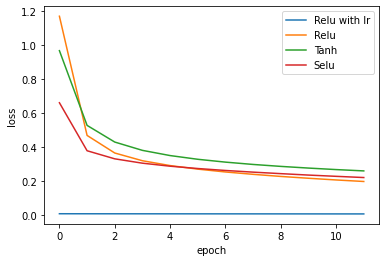

In [ ]:
plt.plot(H.history['loss'], label = 'Relu with lr')
plt.plot(H1.history['loss'], label = 'Relu')
plt.plot(H2.history['loss'], label = 'Tanh')
plt.plot(H3.history['loss'], label = 'Selu')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

#### 3. Change hidden layer:


In [ ]:
model4 = Sequential()
# input_shape
model4.add(Dense(512, activation='relu', input_shape=(784,)))
model4.add(Dense(num_classes, activation='softmax'))

model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01), # adam, .... gradient descent
              metrics=['accuracy'])
H4 = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 1.0998 - accuracy: 0.7579 - val_loss: 0.6005 - val_accuracy: 0.8651
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5232 - accuracy: 0.8723 - val_loss: 0.4329 - val_accuracy: 0.8910
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4211 - accuracy: 0.8903 - val_loss: 0.3736 - val_accuracy: 0.9029
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3747 - accuracy: 0.8999 - val_loss: 0.3405 - val_accuracy: 0.9093
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3462 - accuracy: 0.9054 - val_loss: 0.3192 - val_accuracy: 0.9126
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3260 - accuracy: 0.9103 - val_loss: 0.3030 - val_accuracy: 0.9149
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3099 - accuracy: 0.9146 - val_loss: 0.2897 - val_accuracy: 0.9192
Epoch 

In [ ]:
model5 = Sequential()
# input_shape
model5.add(Dense(num_classes, activation='softmax', input_shape=(784,)))
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01), # adam, .... gradient descent
              metrics=['accuracy'])
H5 = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 1s 3ms/step - loss: 1.2790 - accuracy: 0.7005 - val_loss: 0.8105 - val_accuracy: 0.8386
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.7148 - accuracy: 0.8434 - val_loss: 0.6067 - val_accuracy: 0.8658
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5853 - accuracy: 0.8620 - val_loss: 0.5249 - val_accuracy: 0.8753
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.5235 - accuracy: 0.8706 - val_loss: 0.4793 - val_accuracy: 0.8826
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4859 - accuracy: 0.8769 - val_loss: 0.4498 - val_accuracy: 0.8872
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.8814 - val_loss: 0.4286 - val_accuracy: 0.8895
Epoch 7/12
469/469 [==============================] - 1s 3ms/step - loss: 0.4411 - accuracy: 0.8846 - val_loss: 0.4123 - val_accuracy: 0.8935
Epoch 

In [ ]:
model6 = Sequential()
# input_shape
model6.add(Dense(1024, activation='relu', input_shape=(784,)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(256, activation='relu'))
model6.add(Dense(32, activation='relu'))
model6.add(Dense(num_classes, activation='softmax'))

model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 1,468,522
Trainable params: 1,468,522
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01), # adam, .... gradient descent
              metrics=['accuracy'])
H6 = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/12
469/469 [==============================] - 2s 3ms/step - loss: 1.0513 - accuracy: 0.7415 - val_loss: 0.4283 - val_accuracy: 0.8875
Epoch 2/12
469/469 [==============================] - 1s 3ms/step - loss: 0.3638 - accuracy: 0.9010 - val_loss: 0.2950 - val_accuracy: 0.9166
Epoch 3/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9197 - val_loss: 0.2461 - val_accuracy: 0.9308
Epoch 4/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2433 - accuracy: 0.9301 - val_loss: 0.2234 - val_accuracy: 0.9359
Epoch 5/12
469/469 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.9384 - val_loss: 0.1988 - val_accuracy: 0.9446
Epoch 6/12
469/469 [==============================] - 1s 3ms/step - loss: 0.1945 - accuracy: 0.9446 - val_loss: 0.1855 - val_accuracy: 0.9464
Epoch 7/12
469/469 [==============================] - 2s 3ms/step - loss: 0.1773 - accuracy: 0.9496 - val_loss: 0.1761 - val_accuracy: 0.9494
Epoch 

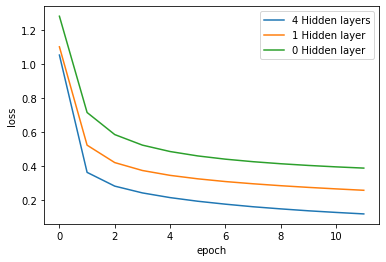

In [ ]:
plt.plot(H6.history['loss'], label = '4 Hidden layers')
plt.plot(H4.history['loss'], label = '1 Hidden layer')
plt.plot(H5.history['loss'], label = '0 Hidden layer')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

## Conclusion


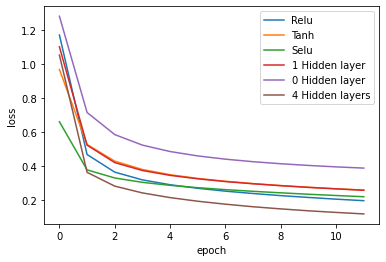

In [ ]:
plt.plot(H1.history['loss'], label = 'Relu')
plt.plot(H2.history['loss'], label = 'Tanh')
plt.plot(H3.history['loss'], label = 'Selu')
plt.plot(H4.history['loss'], label = '1 Hidden layer')
plt.plot(H5.history['loss'], label = '0 Hidden layer')
plt.plot(H6.history['loss'], label = '4 Hidden layers')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()